In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")


# OPSD

In [25]:
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [26]:
df = df.sort_index()

In [27]:
df.Date = pd.to_datetime(df.Date)


In [28]:
df = df.set_index('Date')


In [29]:
df = df.fillna(0)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,0.000,0.000,0.000
2006-01-02,1380.52100,0.000,0.000,0.000
2006-01-03,1442.53300,0.000,0.000,0.000
2006-01-04,1457.21700,0.000,0.000,0.000
2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [30]:
train_index = round(df.shape[0] * .7)


In [31]:
train = df[:train_index]


In [32]:
df.tail()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [33]:
test = df[train_index:]


In [34]:
train.tail(1)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-05-26,1429.811,138.365,137.176,275.541


In [35]:
test.head(1)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-05-27,1464.019,189.127,70.47,259.597


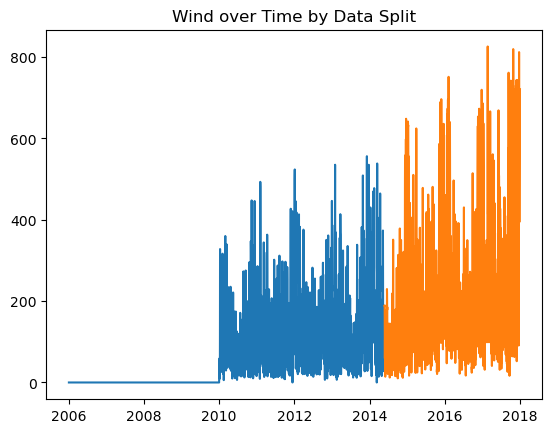

In [36]:
plt.plot(train.index, train.Wind)
plt.plot(test.index, test.Wind)
plt.title('Wind over Time by Data Split')
plt.show()

In [37]:
train = df.loc[:'2014']
test = df.loc[:'2017']

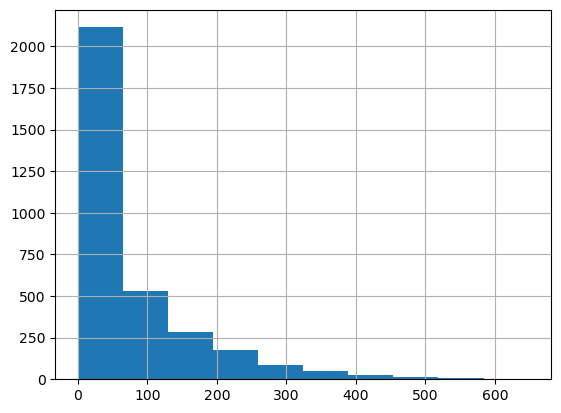

In [38]:
train.Wind.hist()
plt.show()

In [39]:
y = train['Wind']

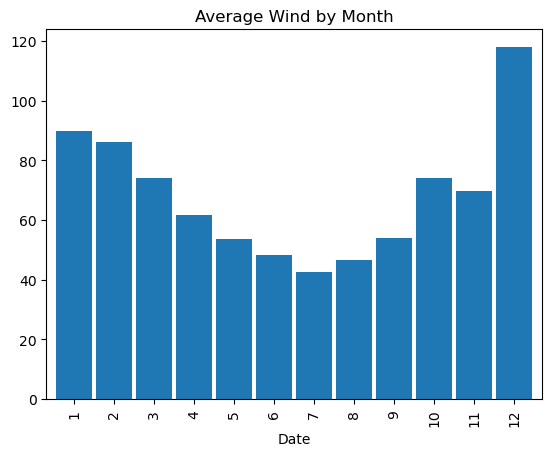

In [40]:
ax = y.groupby(y.index.month).mean().plot.bar(width=0.9)
ax.set_title('Average Wind by Month')
plt.show()

In [41]:
y.groupby(y.index.day_of_week).mean()


Date
0    67.610406
1    64.650106
2    64.514100
3    68.476753
4    69.680603
5    71.254397
6    71.095147
Name: Wind, dtype: float64

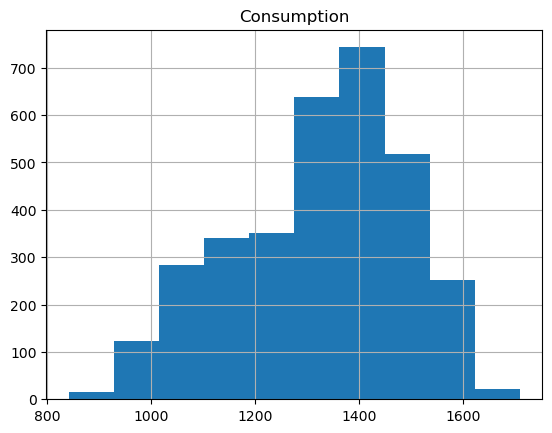

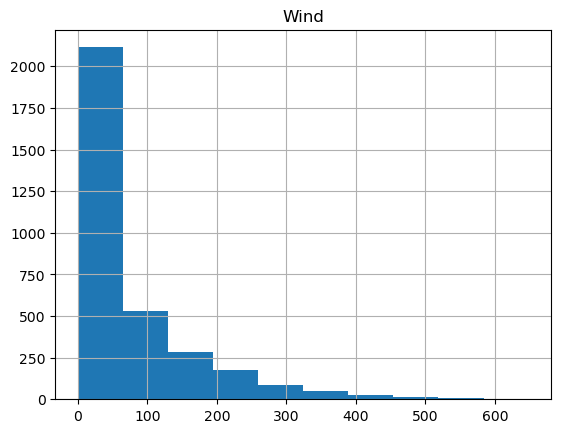

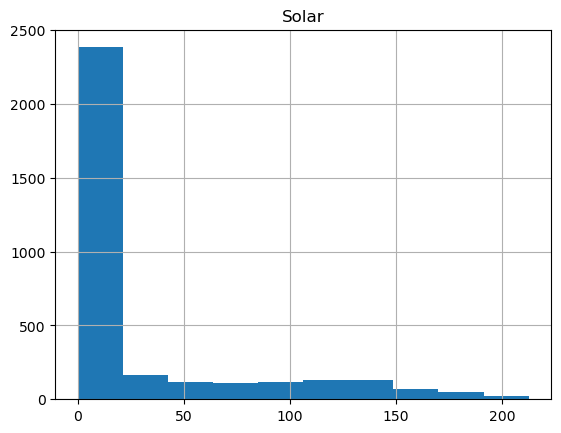

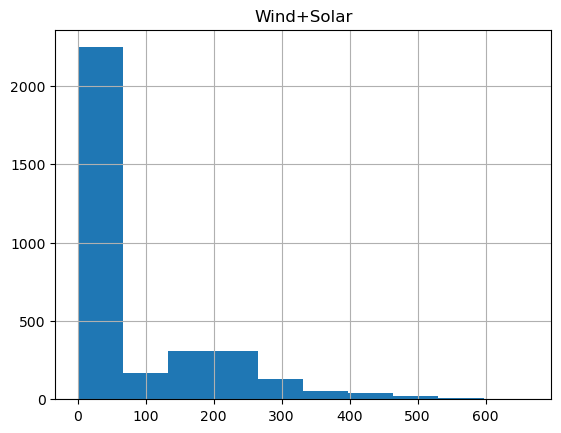

In [42]:
for col in train.columns:
    train[col].hist()
    plt.title(col)
    plt.show()

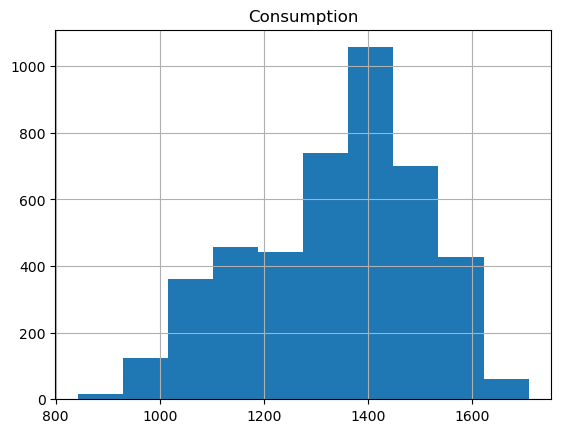

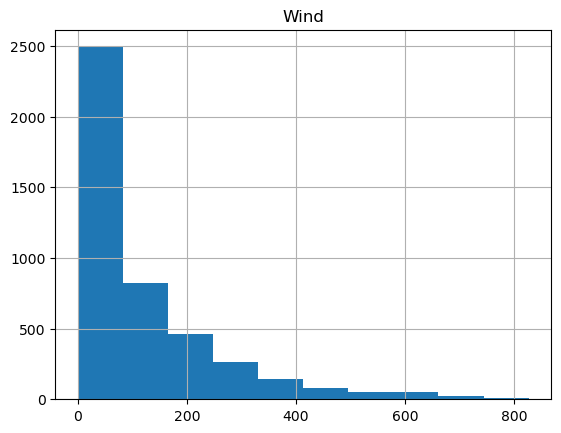

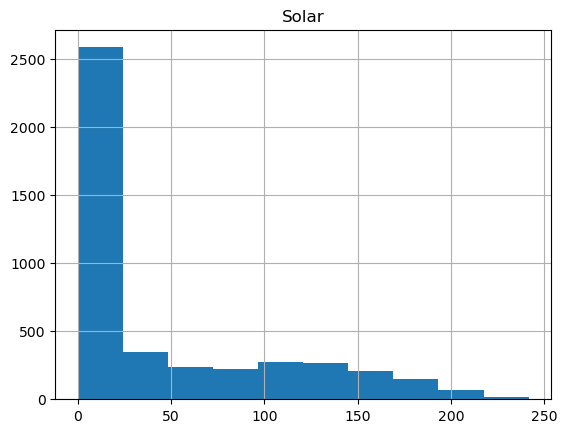

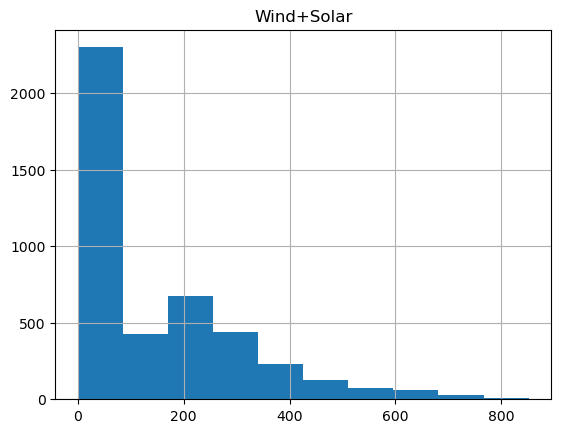

In [43]:
for col in test.columns:
    test[col].hist()
    plt.title(col)
    plt.show()

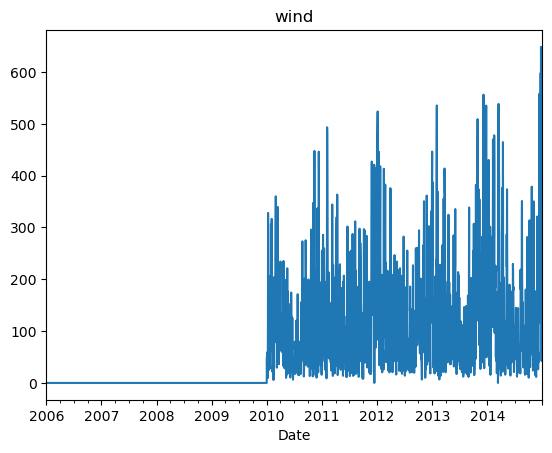

In [44]:
train.Wind.plot()
plt.title('wind')
plt.show()

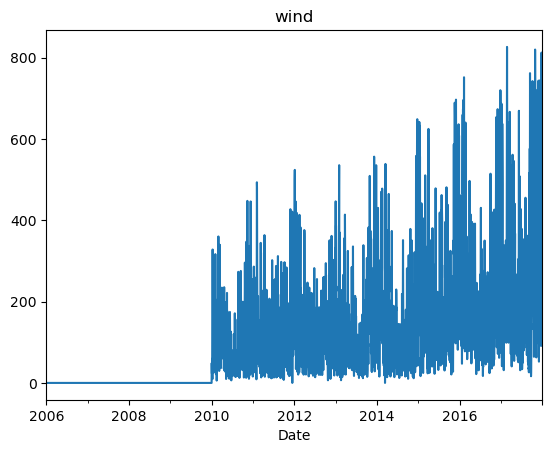

In [45]:
test.Wind.plot()
plt.title('wind')
plt.show()

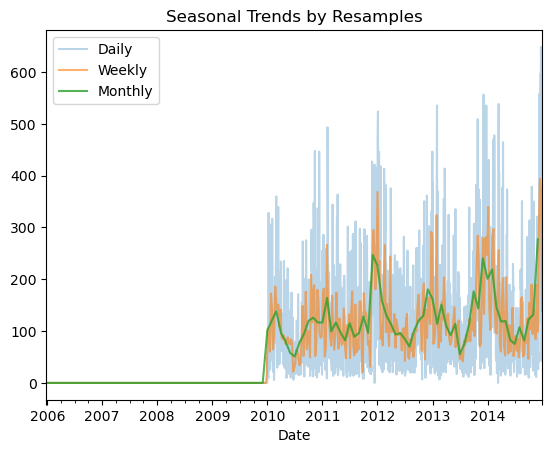

In [46]:
y.resample('1D').mean().plot(label='Daily', alpha=0.3)
y.resample('1W').mean().plot(label='Weekly', alpha=0.6)
y.resample('1M').mean().plot(label='Monthly', alpha=0.8)
# y.resample('1Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Seasonal Trends by Resamples')
plt.show()

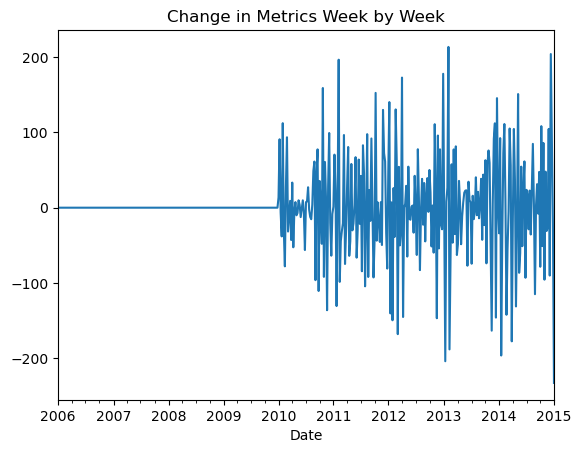

In [47]:
y.resample('W').mean().diff().plot()
plt.title('Change in Metrics Week by Week')
plt.show()

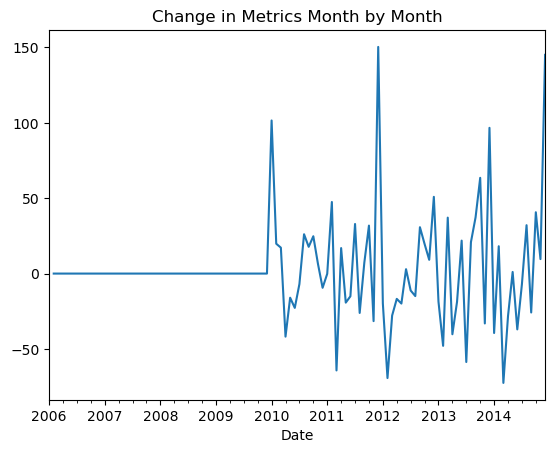

In [48]:
y.resample('M').mean().diff().plot()
plt.title('Change in Metrics Month by Month')
plt.show()

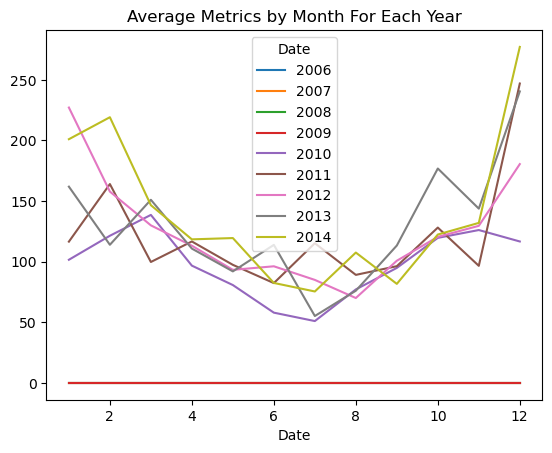

In [49]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('Average Metrics by Month For Each Year')
plt.show()

In [50]:
train.loc[:,'y(t+1)'] = train.Wind.shift(-1).values


/var/folders/l4/9qx5m7ds6n5ffgt96477s8gr0000gn/T/ipykernel_64714/1878455611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,'y(t+1)'] = train.Wind.shift(-1).values


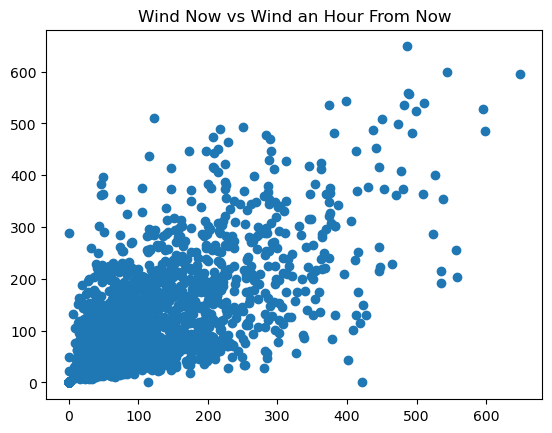

In [51]:
plt.scatter(train.Wind, train['y(t+1)'])
plt.title('Wind Now vs Wind an Hour From Now')
plt.show()

In [54]:
train = train.drop(columns=['y(t+1)'])


In [55]:
train.loc[:,'next_week'] = train.Wind.shift(-1).values


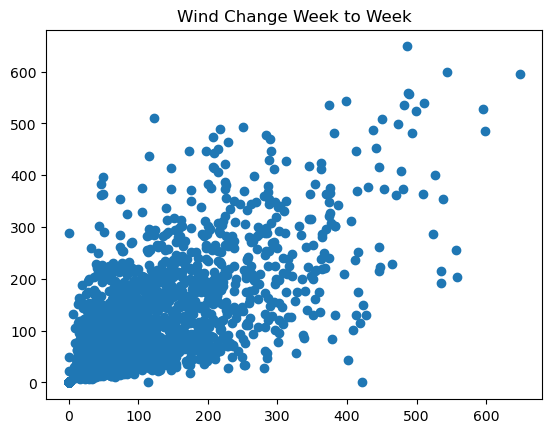

In [56]:
plt.scatter(train.Wind, train.next_week)
plt.title('Wind Change Week to Week')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 52)'>

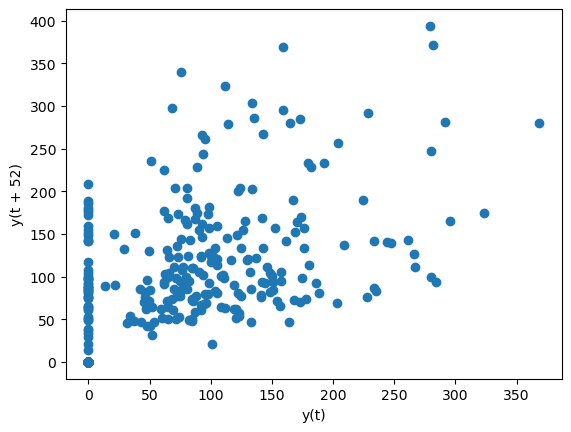

In [57]:
pd.plotting.lag_plot(train.Wind.resample('W').mean(), 52)


In [58]:
y = train.Wind.resample('W').mean()


In [59]:
result = sm.tsa.seasonal_decompose(y)


In [60]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid
})

In [61]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()


<Axes: xlabel='Date'>

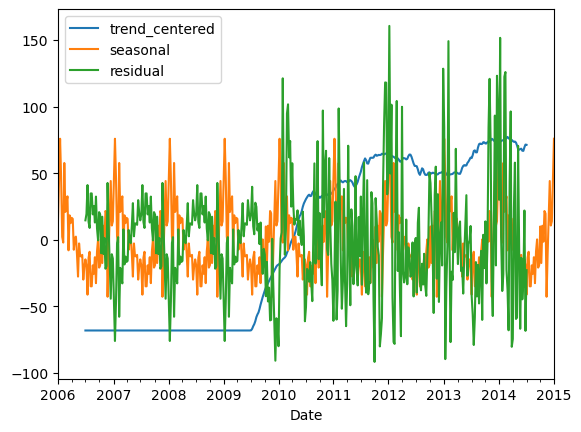

In [62]:
decomposition[['trend_centered', 'seasonal', 'residual']].plot()


# Store

In [66]:
from env import host, user, password
import pandas as pd

In [67]:
def get_db_url(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [68]:
def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    url = get_db_url('tsa_item_demand')

    query = '''
            SELECT *
            FROM items
            JOIN sales USING(item_id)
            JOIN stores USING(store_id)
            '''

    df = pd.read_sql(query, url)
    df.to_csv('tsa_store_data.csv', index=False)
    return df

In [69]:
df = get_store_data()
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  object 
 3   item_upc12     913000 non-null  object 
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 97.5+ MB


In [71]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

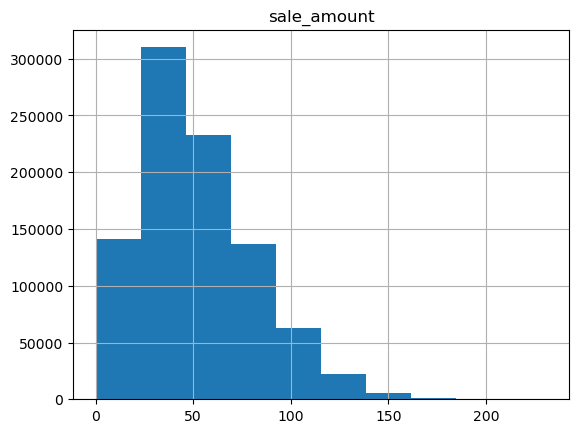

In [72]:
df.sale_amount.hist()
plt.title('sale_amount')
plt.show()

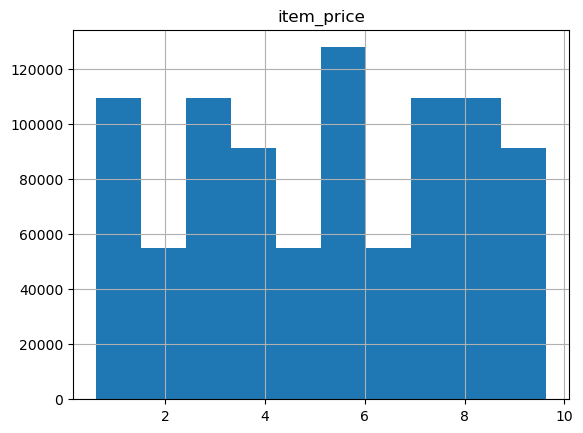

In [73]:
df.item_price.hist()
plt.title('item_price')
plt.show()

In [74]:
df = df.set_index('sale_date')
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [75]:

df['month'] = df.index.strftime('%B')
df['day of the week'] = df.index.day_name()

In [76]:
df['sales_total'] = df.sale_amount * df.item_price


In [77]:
df = df.fillna(0)


In [78]:
train_index = round(df.shape[0] * .7)


In [79]:
train = df[:train_index]


In [80]:
test = df[train_index:]


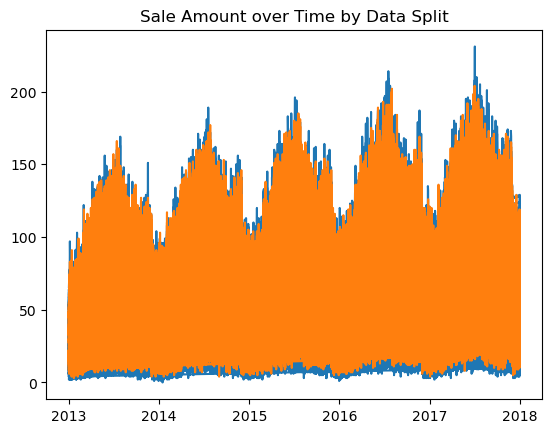

In [82]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.title('Sale Amount over Time by Data Split')
plt.show()

In [83]:
y = train['sale_amount']

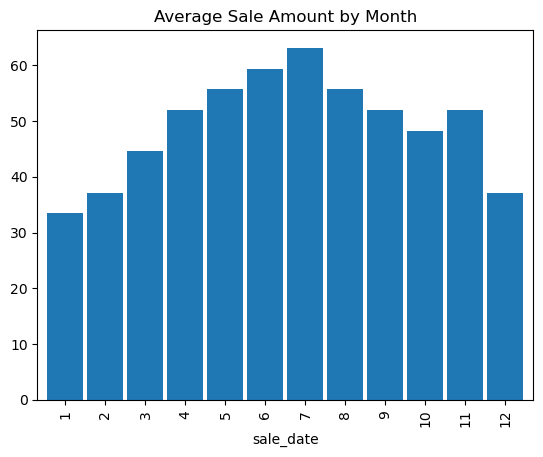

In [84]:
ax = y.groupby(y.index.month).mean().plot.bar(width=0.9)
ax.set_title('Average Sale Amount by Month')
plt.show()

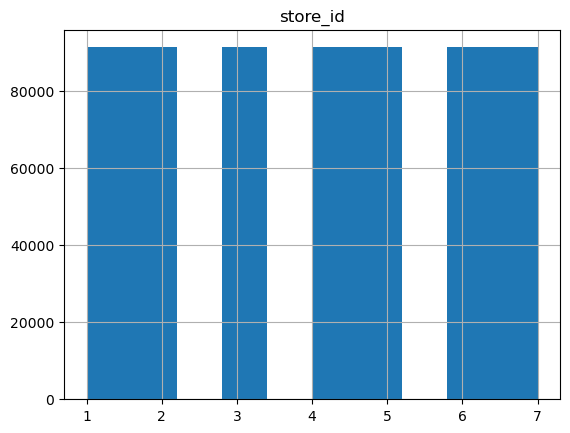

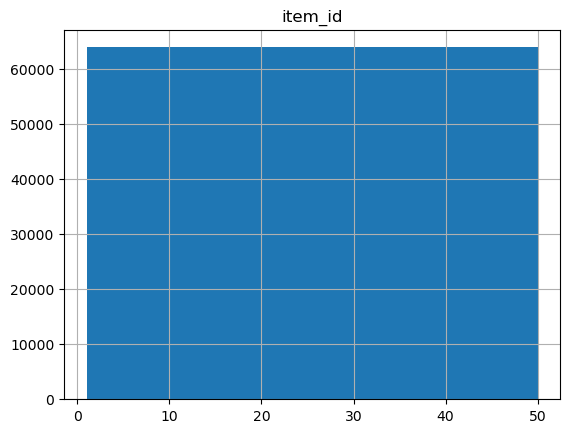

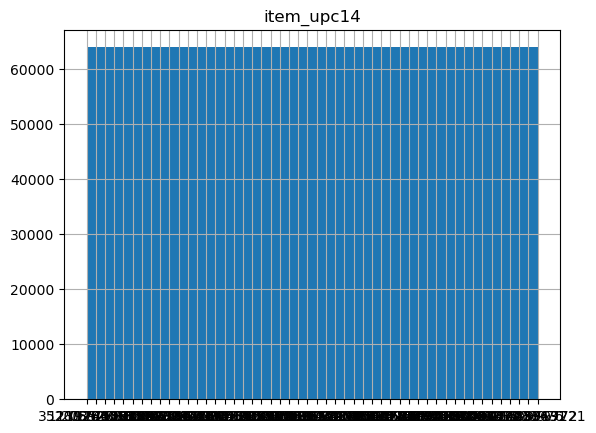

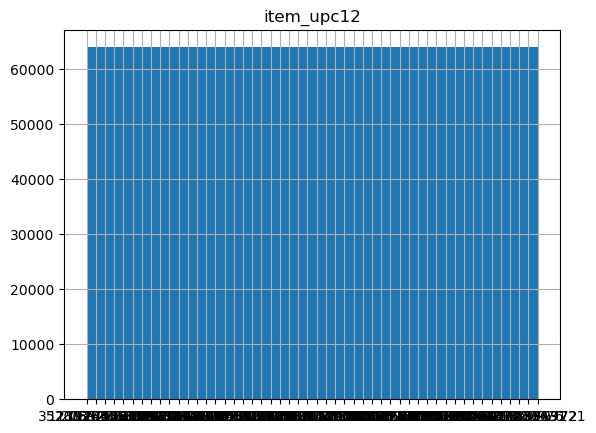

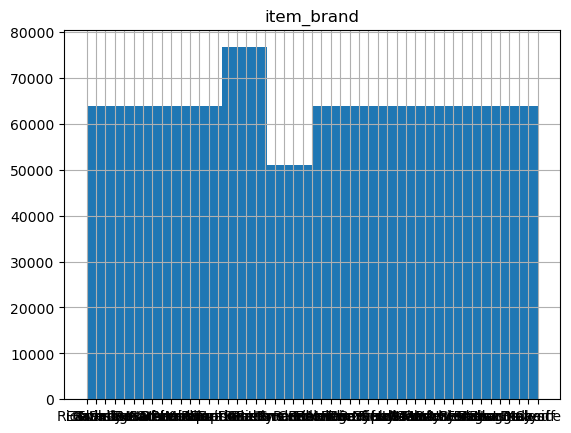

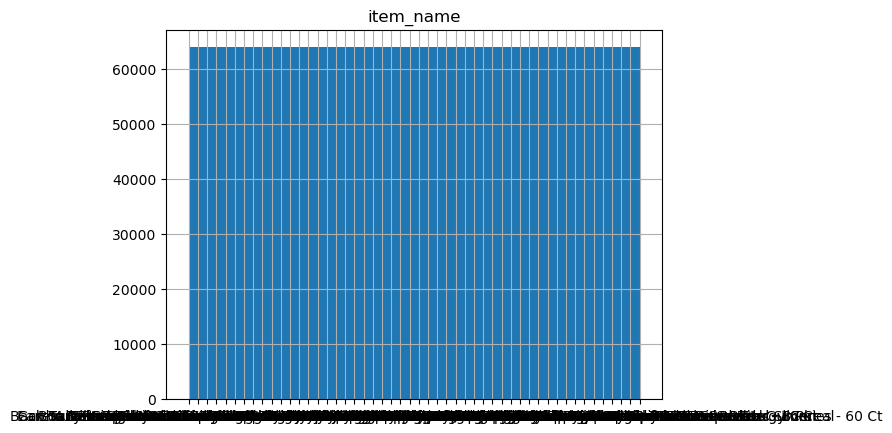

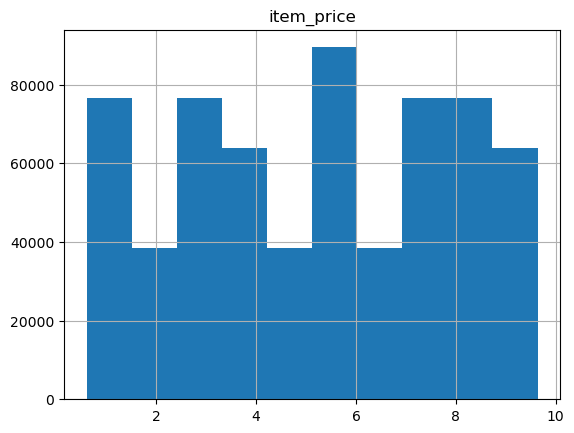

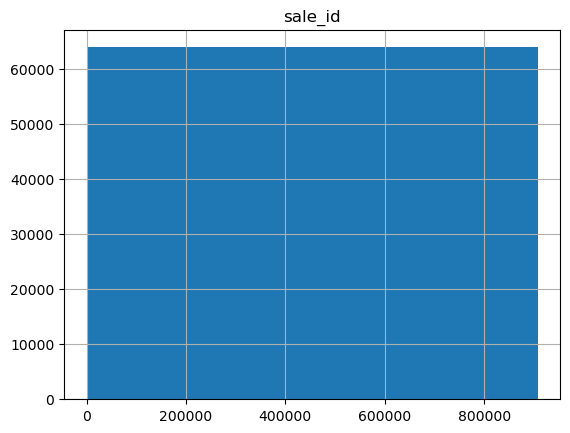

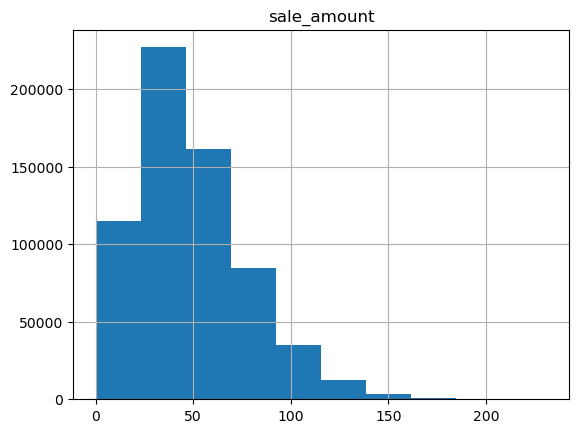

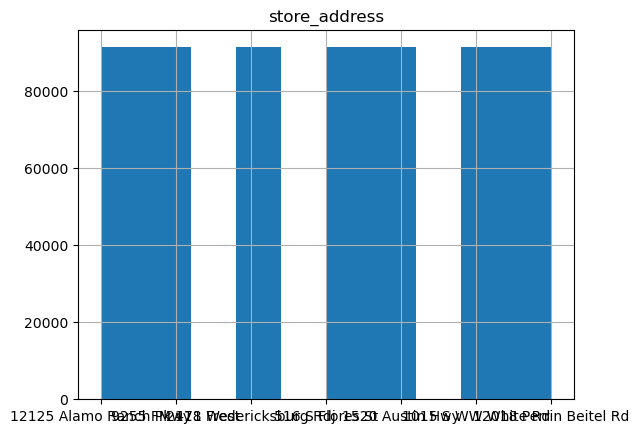

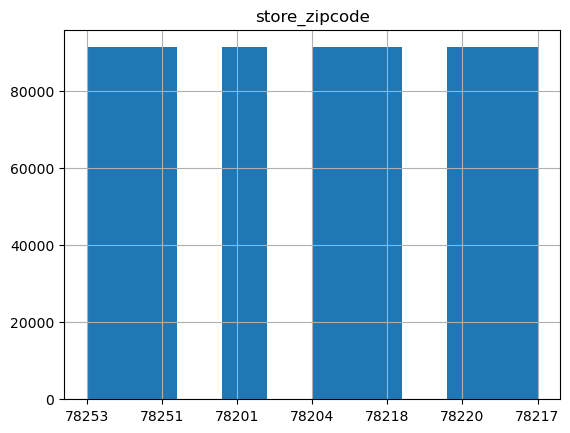

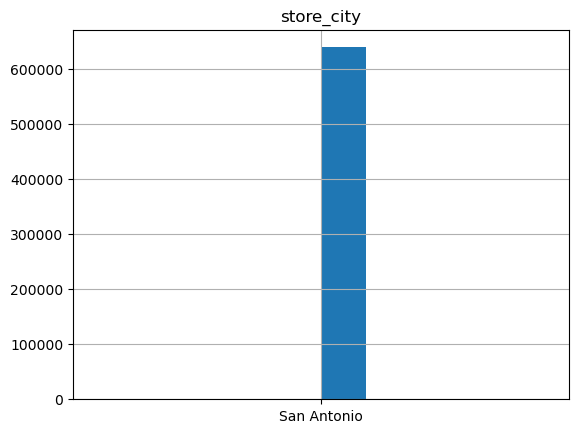

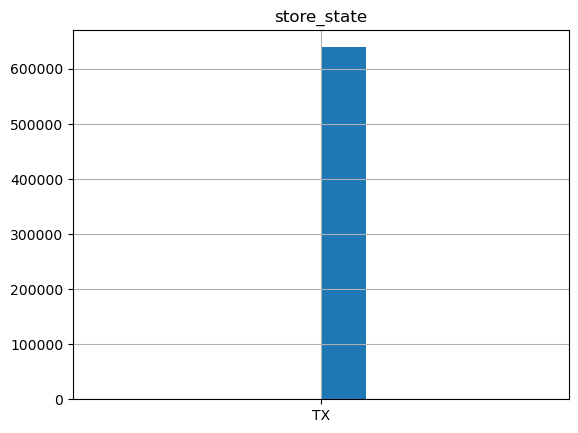

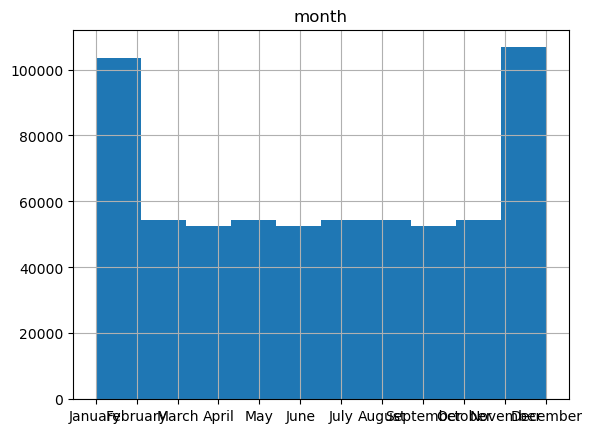

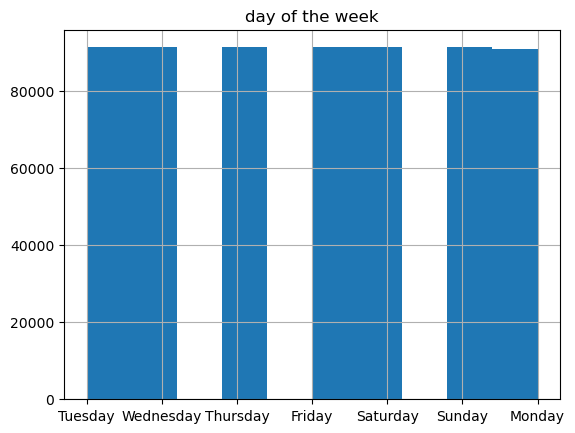

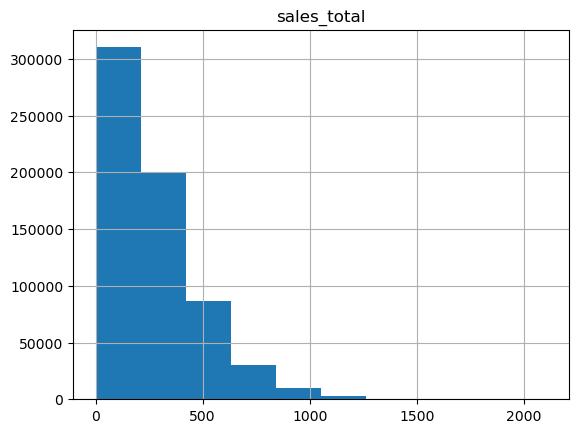

In [85]:
for col in train.columns:
    train[col].hist()
    plt.title(col)
    plt.show()

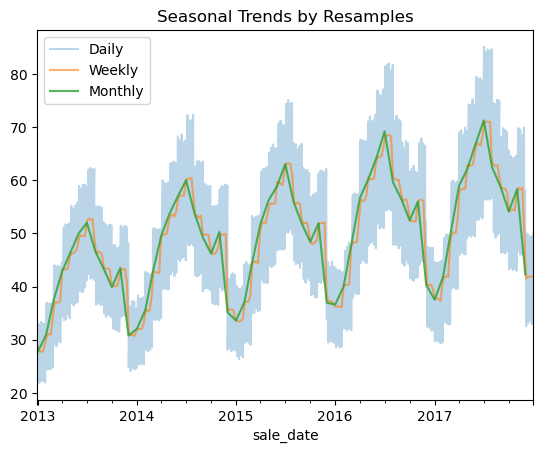

In [86]:
y.resample('1D').mean().plot(label='Daily', alpha=0.3)
y.resample('1W').mean().plot(label='Weekly', alpha=0.6)
y.resample('1M').mean().plot(label='Monthly', alpha=0.8)
# y.resample('1Y').mean().plot(label='Yearly')
plt.legend()
plt.title('Seasonal Trends by Resamples')
plt.show()

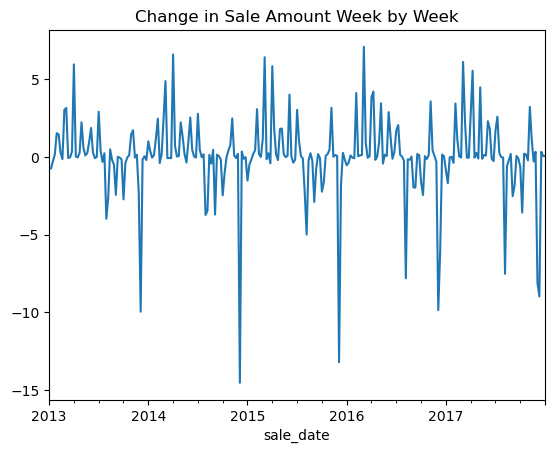

In [90]:
y.resample('W').mean().diff().plot()
plt.title('Change in Sale Amount Week by Week')
plt.show()